In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('daily-minimum-temperatures-in-me.csv')
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [3]:
df.columns=['Date','MinTemp']

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['MinTemp']=pd.to_numeric(df['MinTemp'],errors='coerce').astype('float64')


In [9]:
df.Date.value_counts().count()

3650

In [10]:
df['Date'].min()

Timestamp('1981-01-01 00:00:00')

In [11]:
df['Date'].max()

Timestamp('1990-12-31 00:00:00')

In [ ]:
#All are unique and no missing date

In [12]:
lm=df

In [13]:
lm.set_index('Date',inplace=True)
lm


,MinTemp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [ ]:
#So in order to find the avg temp in a month


In [14]:
AvgtempMon=lm.resample('MS').mean()

In [15]:
AvgtempMon

,MinTemp
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323
...,...
1990-08-01,7.825806
1990-09-01,9.166667
1990-10-01,11.345161


<Figure size 432x288 with 0 Axes>

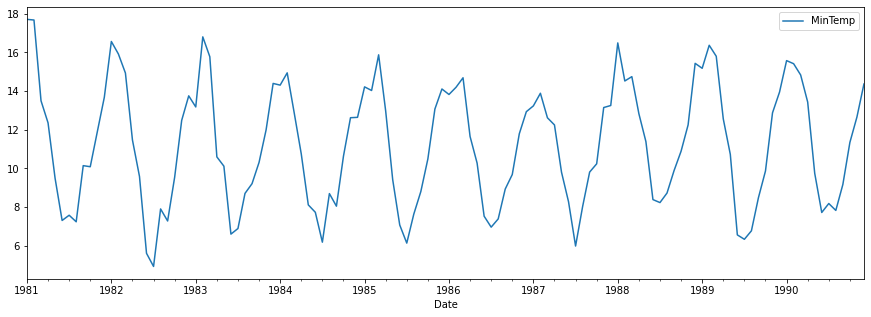

In [20]:
plt.figure()
AvgtempMon.plot(figsize=(15,5))
plt.show()

p, d, q reprents the auto-regressive, Integrating/Differentiating and Moving averagre parts Respectively
They take 0 or 1

So in order to find the seasonal part
we shift and subtract

In [24]:
AvgtempMon['Seasonal Difference']=AvgtempMon['MinTemp']-AvgtempMon['MinTemp'].shift(12)
AvgtempMon.tail(10)

,MinTemp,Seasonal Difference
Date,,
1990-03-01,14.835484,-0.967742
1990-04-01,13.433333,0.870000
1990-05-01,9.748387,-0.977419
1990-06-01,7.720000,1.160000
1990-07-01,8.183871,1.851613
1990-08-01,7.825806,1.054839
1990-09-01,9.166667,0.680000
1990-10-01,11.345161,1.477419
1990-11-01,12.656667,-0.220000


In [22]:
AvgtempMon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1981-01-01 to 1990-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MinTemp              120 non-null    float64
 1   Seasonal Difference  108 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


In [25]:
AvgtempMon['Seasonal Difference'].dropna()

Date
1982-01-01   -1.145161
1982-02-01   -1.757143
1982-03-01    1.435484
1982-04-01   -0.886667
1982-05-01    0.093548
                ...   
1990-08-01    1.054839
1990-09-01    0.680000
1990-10-01    1.477419
1990-11-01   -0.220000
1990-12-01    0.416129
Freq: MS, Name: Seasonal Difference, Length: 108, dtype: float64

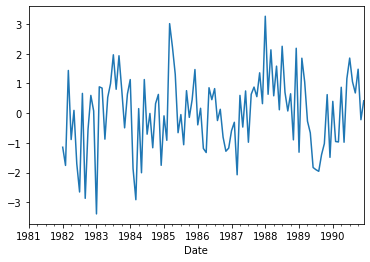

In [26]:
AvgtempMon['Seasonal Difference'].plot()

We will now find the best p and q with ACF and PACF
Generally AR part is found by ACF
and the MA part is best found by PACF

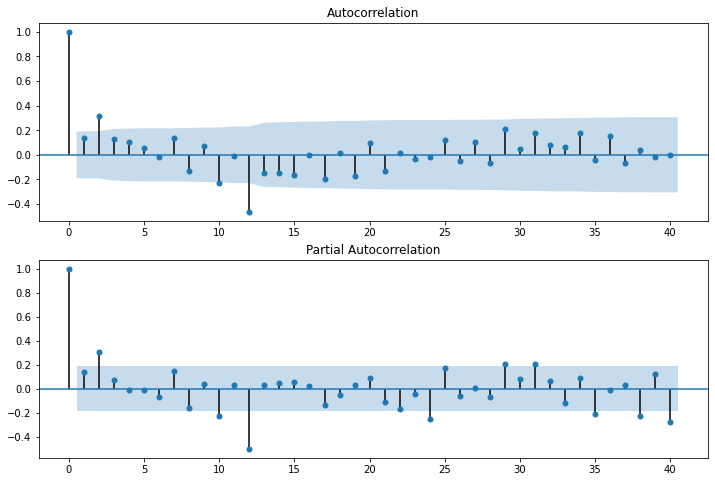

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(AvgtempMon['Seasonal Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(AvgtempMon['Seasonal Difference'].iloc[13:],lags=40,ax=ax2)

In [32]:
#Therefore we take p=1,q=1

In [30]:
model=sm.tsa.statespace.SARIMAX(AvgtempMon['MinTemp'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

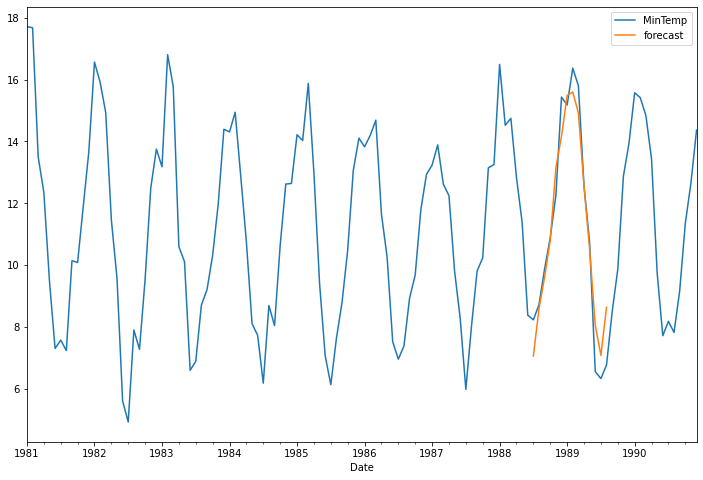

In [31]:
AvgtempMon['forecast']=results.predict(start=90,end=103,dynamic=True)
AvgtempMon[['MinTemp','forecast']].plot(figsize=(12,8))